In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import rc, rcParams, font_manager 
#!find / -name "*Nanum*.ttf"
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf'
fontName = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=fontName)

import seaborn as sns
from sklearn.datasets import load_wine, load_iris
import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)

---
### 단일표본 t 검정 

- 정규성 검정 : shapiro 
  - 정규분포 O : t-test
  - 정규분포 X : 윌콕슨 부호 순위 검정 


- 소표본이면, 비모수 통계(윌콕슨)

In [22]:
# H0 : 고양이 몸무게는 2.6킬로그램이다. 
cats = pd.read_csv('ADP_book_ver01/data/cats.csv')
print(cats.isnull().sum())
cats.tail(3)

Sex    0
Bwt    0
Hwt    0
dtype: int64


,Sex,Bwt,Hwt
141,M,3.80,16.80
142,M,3.90,14.40
143,M,3.90,20.50


In [24]:
# 1. 정규성 검증 
import scipy.stats as stats
from scipy.stats import shapiro 

shapiro(cats['Bwt'])   # H0 기각, 정규분포 아님 -> 윌크스 통계 

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

count   144.00
mean      2.72
std       0.49
min       2.00
25%       2.30
50%       2.70
75%       3.02
max       3.90
Name: Bwt, dtype: float64


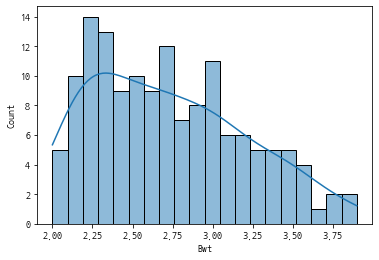

In [34]:
print(cats['Bwt'].describe())
sns.histplot(cats['Bwt'], kde=True, bins=20);

In [30]:
mu = 2.6
stats.wilcoxon(cats['Bwt'] - mu, alternative='two-sided')  # H0 기각, 2.6이 아니다. 

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [37]:
# (참고) 정규분포 가정을 만족하면, t-test를 시행한다. 
stats.ttest_1samp(cats['Bwt'], popmean=2.6, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

---
### 대응표본 t-검정

- 정규성 검정 
  - 정규성 기각 : 윌콕슨 부호 순위 검정 
  - 정규성 만족 : t-test
  
  
- 소표본이면, 비모수 통계(윌콕슨)

In [38]:
# H0 : 두 모평균에 차이가 없다. 
data = {'before':[7,3,4,5,2,1,6,6,5,4],
        'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [39]:
# 정규성 검정 
from scipy.stats import shapiro 
print(shapiro(data['before']))
print(shapiro(data['after']))  # 모두 정규분포 만족 -> t-test 

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)
ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)


In [42]:
stats.ttest_rel(data['before'], data['after'], alternative='two-sided')  # 차이가 존재함

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

In [48]:
# 시각화 확인
ata_stacked = data.stack().reset_index()
data_stacked.columns = ['level_0', 'treat', 'values']
data_stacked.tail()

,level_0,treat,values
15,7,after,8
16,8,before,5
17,8,after,6
18,9,before,4
19,9,after,5


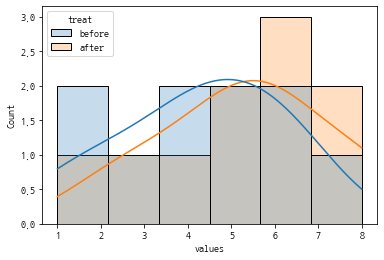

In [53]:
sns.histplot(x='values', hue='treat', kde=True, alpha=0.25, data=data_stacked);

<AxesSubplot:xlabel='treat', ylabel='values'>

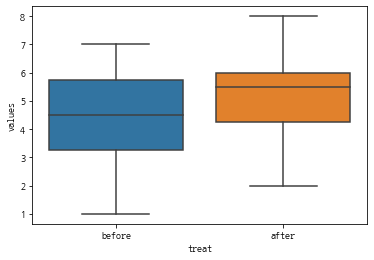

In [54]:
sns.boxplot(x='treat', y='values', data=data_stacked)

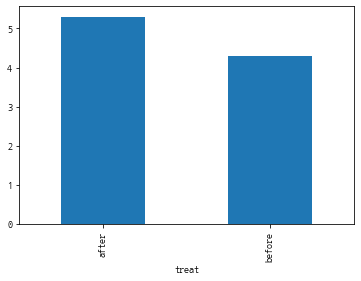

In [58]:
data_stacked.groupby(['treat'])['values'].mean().plot(kind='bar');

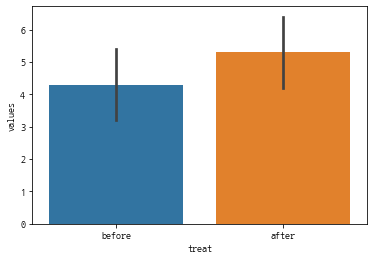

In [61]:
sns.barplot(x='treat', y='values', data=data_stacked);

In [66]:
# (참고) 차이값이 0인지 검정  
data['gap'] = data['after'] - data['before']
shapiro(data['gap']) # H0기각 : 정규분포 아님 (샘플수도 적어서 비모수 통계가 어짜피 적합)

ShapiroResult(statistic=0.8148399591445923, pvalue=0.021947985514998436)

In [67]:
stats.wilcoxon(data['gap'], alternative='two-sided')  # H0 기각 : 0이 아님(전후 효과 존재)

WilcoxonResult(statistic=0.0, pvalue=0.00829921599528076)

<AxesSubplot:xlabel='gap', ylabel='Count'>

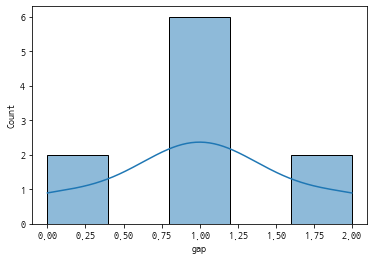

In [68]:
sns.histplot(data['gap'], kde=True)

---
### 독립표본 t-test

- 정규성 검정 : 정규분포가 아니면 윌콕슨 순위 검정 
- 등분산성 검정 : 등분산이면 equal_var=True, 이분산이면 equal_var=False 

In [80]:
# H0 : 고양이 암컷과 수컷간에 몸무가 차이가 없다. 
cats = pd.read_csv('ADP_book_ver01/data/cats.csv')
print(cats.groupby(['Sex'])['Bwt'].agg(['size', 'mean', 'std']))

female = cats.query(" Sex == 'F'")['Bwt']
male = cats.query(" Sex == 'M'")['Bwt']

     size  mean  std
Sex                 
F      47  2.36 0.27
M      97  2.90 0.47


In [73]:
# 정규성 검정 ---> 교재에서는 생략 
print(shapiro(male))
print(shapiro(female))

ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)
ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)


In [77]:
# 정규성 위해 되므로 윌콕슨 검정 --> 교재에서는 생략
# stats.wilcoxon(male, female, alternative='two-sided')  # -> 두 관측치수가 틀려서 검정 불가
stats.wilcoxon(male.sample(len(female)), female, alternative='two-sided')  #>> 요거는 샘플수 강제 맞추기 꼼수.. H0 기각됨 

WilcoxonResult(statistic=52.5, pvalue=9.531065760143355e-08)

In [82]:
# 등분산 검정 : H0 분산이 같다 
stats.levene(female, male)  # H0 기각, 분산이 틀림 

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [83]:
# 평균차이 검정  : 등분산이 아니므로 equal_var=False
stats.ttest_ind(female, male, equal_var=False)  # H0 기각, 평균 차이 존재 

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

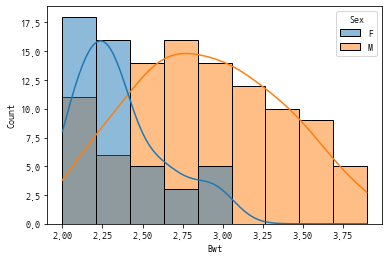

In [88]:
sns.histplot(x='Bwt', hue='Sex', alpha=0.5, kde=True, data=cats);

### 분산 검정 

- ADP 파이썬 422쪽

In [89]:
# H0 : 금속 재료 분산은 1.3이다 

df = pd.read_csv('ADP_book_ver01/data/metalicity')
df.tail()

,metalicity
145,45.92
146,45.28
147,45.08
148,44.30
149,45.51


In [90]:
# 정규분포인지 검정
shapiro(df['metalicity'])  # 0.05보다 살짝 크다. H0 정규분포 채택  

ShapiroResult(statistic=0.9822468757629395, pvalue=0.05002119019627571)

In [91]:
df['metalicity'].describe()

count   150.00
mean     45.27
std       0.86
min      42.73
25%      44.60
50%      45.36
75%      45.83
max      47.04
Name: metalicity, dtype: float64

In [95]:
# 정규분포이면서, 평균은 모집단과 동일하고, 분산은 1.3(표준편차는 1.4)를 만족하는 테스트 세트를 만든다. 
mu = df['metalicity'].mean()
std = np.sqrt(1.3)
print(mu, std)

test = np.random.normal(mu, std, len(df))

45.26662991017956 1.140175425099138


In [97]:
# 등분산 검정  
stats.levene(df['metalicity'], test)  # H0 기각 : 등분산 아님 

LeveneResult(statistic=5.604037106465578, pvalue=0.018557907349710804)

In [103]:
df_merge = df.copy()
df_merge['test_value'] = test
df_merge = df_merge.stack().reset_index()
df_merge.columns = ['level_0', 'treat', 'values']
df_merge.tail()

,level_0,treat,values
295,147,test_value,44.47
296,148,metalicity,44.30
297,148,test_value,45.47
298,149,metalicity,45.51
299,149,test_value,45.01


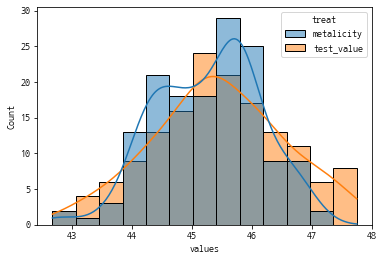

In [106]:
sns.histplot(x='values', hue='treat', alpha=0.5, kde=True, data=df_merge);  # 정규분포와는 상이함(파란색)

---

### 분산분석 - 일원배치 

- 정규성 검정 
  - 기각시 stats.kruscal 
  
- 등분산 검정 
  - 기각시 welch_anova 
  - 채택시 stats.f_oneway
  
- 사후검정 (평균차이 존재) 
  - 튜키 검정 

In [113]:
#!pip install pingouin  # 시험장 미리 설치됨
import scipy.stats as stats
#import pingouin as pg   # 등분산이 아닐때 --> 클라우드 설치 오류 ㅠ.ㅜ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [115]:
iris_data = pd.read_csv('ADP_book_ver01/data/iris.csv')
iris_data.tail(1)

,sepal length,sepal width,petal length,petal width,target
149,5.90,3.00,5.10,1.80,Iris-virginica


In [117]:
# H0 : 세 품종의 sepal.width 평균은 같다 
target_list = iris_data['target'].unique()
setosa = iris_data.query("target == 'Iris-setosa'")['sepal width']
versicolor = iris_data.query("target == 'Iris-versicolor'")['sepal width']
virginica = iris_data.query("target == 'Iris-virginica'")['sepal width']

# 정규성 검정 
print(shapiro(setosa))
print(shapiro(versicolor))
print(shapiro(virginica))  # H0 채택 : 모두 정규분포 

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [119]:
# 등분산 검정
stats.levene(setosa, versicolor, virginica)  # H0 채택 : 등분산 만족 

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [121]:
# 분산분석 
stats.f_oneway(setosa, versicolor, virginica)  # H0 기각 : 평균차이 존재 

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

<AxesSubplot:xlabel='target', ylabel='sepal width'>

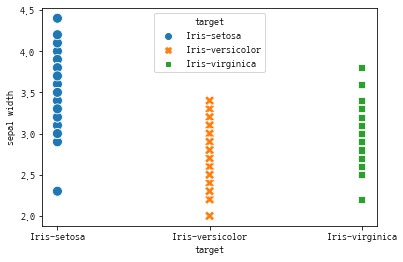

In [122]:
sns.scatterplot(x='target',
                y='sepal width',
                hue='target',
                style='target',
                s=100,
                data=iris_data)

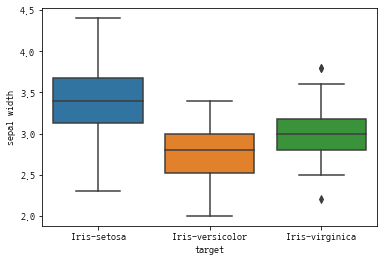

In [124]:
sns.boxplot(x='target', y='sepal width', data=iris_data);

In [126]:
# 평균차이 검정 
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

mc = MultiComparison(data=iris_data['sepal width'], groups=iris_data['target'])
tukey = mc.tukeyhsd(alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


In [127]:
# 만약 정규성을 만족하지 못한 경우, kruskal 검정 
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [ ]:
# 만약 등분산성을 만족하지 못한 경우, welch-anova 분석
#pg.welch_anova??
from pingouin import welch_anova, read_dataset
df = read_dataset('anova')
aov = welch_anova(dv='Pain threshold', between='Hair color', data=df)
aov

---
### 이원배치 분산분석

- 주효과 1,2와 교호작용 검증

In [130]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

df = pd.read_csv('ADP_book_ver01/data/mtcars.csv')[['mpg', 'am', 'cyl']]

formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, tpy=2)
aov_table   # 주효과 1,2는 평균차이 존재. 교호작업은 유의하지 않음 

,df,sum_sq,mean_sq,F,PR(>F)
C(cyl),2.00,824.78,412.39,44.85,0.00
C(am),1.00,36.77,36.77,4.00,0.06
C(cyl):C(am),2.00,25.44,12.72,1.38,0.27
Residual,26.00,239.06,9.19,NaN,NaN


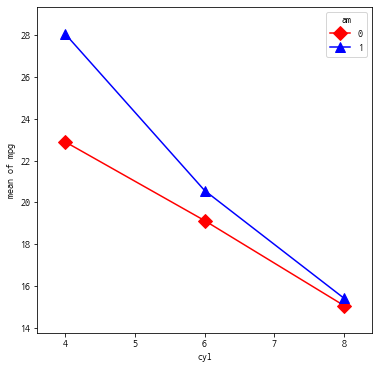

In [131]:
from statsmodels.graphics.factorplots import interaction_plot 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(df['cyl'], df['am'], df['mpg'],
                       colors=['r', 'b'], markers=['D', '^'],
                       ms=10, ax=ax)

In [134]:
# anova_lm help 문 
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
data = moore.data
data = data.rename(columns={"partner.status" : "partner_status"}) # make name pythonic
data.tail(3)

,partner_status,conformity,fcategory,fscore
42,high,16,low,35
43,high,10,high,52
44,high,15,medium,44


In [135]:
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
print(table)

                                          sum_sq    df     F  PR(>F)
C(fcategory, Sum)                          11.61  2.00  0.28    0.76
C(partner_status, Sum)                    212.21  1.00 10.12    0.00
C(fcategory, Sum):C(partner_status, Sum)  175.49  2.00  4.18    0.02
Residual                                  817.76 39.00   NaN     NaN


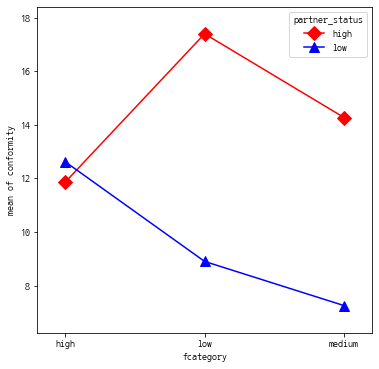

In [136]:
fig, ax =  plt.subplots(figsize=(6,6))
fig = interaction_plot(data['fcategory'], data['partner_status'], data['conformity'], 
                        colors=['red', 'blue'], markers=['D', '^'],
                        ms=10, ax=ax)

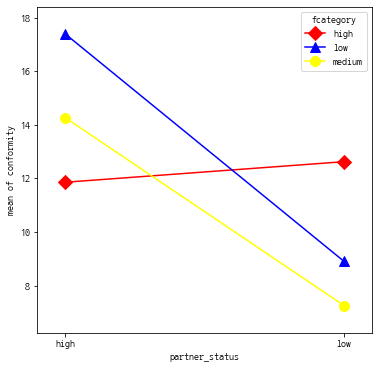

In [139]:
fig, ax =  plt.subplots(figsize=(6,6))
fig = interaction_plot(data['partner_status'], data['fcategory'], data['conformity'], 
                       colors=['red', 'blue', 'yellow'], markers=['D', '^', 'o'],
                       ms=10, ax=ax)

그래프 교차시, 교호작용 존재하는 것으로 해석

--- 

### 상관분석

In [171]:
adms = pd.read_csv('datafiles/Admission.csv')
adms.tail(3)

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
397,330,116,4,5.00,4.50,9.45,1,0.91
398,312,103,3,3.50,4.00,8.78,0,0.67
399,333,117,4,5.00,4.00,9.66,1,0.95


In [175]:
from scipy.stats import pearsonr, spearmanr 

for col in ['GRE','TOEFL','Univ_Rating','SOP','LOR ']:
    print('상관계수 분석 : ', col)
    c, p = pearsonr(adms['Chance_of_Admit'], adms[col])
    print('상관계수: {:,.2f}, p-value: {:,.8f}'.format(c, p))
    print('\n')

상관계수 분석 :  GRE
상관계수: 0.80, p-value: 0.00000000


상관계수 분석 :  TOEFL
상관계수: 0.79, p-value: 0.00000000


상관계수 분석 :  Univ_Rating
상관계수: 0.71, p-value: 0.00000000


상관계수 분석 :  SOP
상관계수: 0.68, p-value: 0.00000000


상관계수 분석 :  LOR 
상관계수: 0.67, p-value: 0.00000000




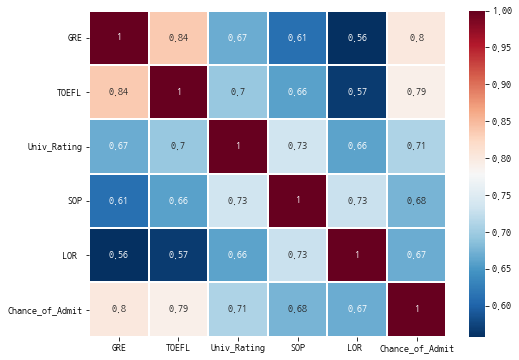

In [178]:
cor = adms[['GRE','TOEFL','Univ_Rating','SOP','LOR ','Chance_of_Admit']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, cmap='RdBu_r', linewidth=1, linecolor='white', annot=True);

In [198]:
# R교재 : 177쪽
df = pd.read_csv('datafiles/airquality.csv')
print(df.isnull().sum())  # 오존 결측치 있음 
df.tail(3)

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
dtype: int64


,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
150,151,14.00,191.00,14.30,75,9,28
151,152,18.00,131.00,8.00,76,9,29
152,153,20.00,223.00,11.50,68,9,30


In [194]:
df[['Ozone','Solar.R','Wind','Temp','Month']].corr(method='pearson') #method : {'pearson', 'kendall', 'spearman'} 

,Ozone,Solar.R,Wind,Temp,Month
Ozone,1.00,0.35,-0.60,0.70,0.16
Solar.R,0.35,1.00,-0.06,0.28,-0.08
Wind,-0.60,-0.06,1.00,-0.46,-0.18
Temp,0.70,0.28,-0.46,1.00,0.42
Month,0.16,-0.08,-0.18,0.42,1.00


In [195]:
df[['Ozone','Solar.R','Wind','Temp','Month']].corr(method='kendall') #method : {'pearson', 'kendall', 'spearman'} 

,Ozone,Solar.R,Wind,Temp,Month
Ozone,1.00,0.24,-0.43,0.59,0.10
Solar.R,0.24,1.00,0.00,0.14,-0.10
Wind,-0.43,0.00,1.00,-0.32,-0.12
Temp,0.59,0.14,-0.32,1.00,0.28
Month,0.10,-0.10,-0.12,0.28,1.00


In [196]:
df[['Ozone','Solar.R','Wind','Temp','Month']].corr(method='spearman') #method : {'pearson', 'kendall', 'spearman'} 

,Ozone,Solar.R,Wind,Temp,Month
Ozone,1.00,0.35,-0.59,0.77,0.14
Solar.R,0.35,1.00,-0.00,0.21,-0.13
Wind,-0.59,-0.00,1.00,-0.45,-0.16
Temp,0.77,0.21,-0.45,1.00,0.37
Month,0.14,-0.13,-0.16,0.37,1.00


In [205]:
#### 주의 : 파이썬에서는 결측치 포함시 상관계수 검정 안됨 (R에서는 자동 계산 )
from scipy.stats import pearsonr, spearmanr 

df_clean = df.dropna(subset=['Ozone'])
print(len(df_clean))
pearsonr(df_clean['Ozone'], df_clean['Temp'])

116


(0.698360342150932, 2.9318965924778345e-18)

In [206]:
pearsonr(df_clean['Ozone'], df_clean['Wind'])

(-0.6015465298889503, 9.271973903938078e-13)

---

### 교차분석

In [141]:
# 적합성 검정 : 이론적으로 기대하는 분포를 따르는지 검정(예: 주사위 1/6인가?)
# H0 : 생존자의 남자와 여자 비율이 50% 
df = pd.read_csv('ADP_book_ver01/data/titanic.csv')
df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
888,0,3,female,NaN,1,2,23.45,S,Third,False,Southampton
889,1,1,male,26.00,0,0,30.00,C,First,True,Cherbourg
890,0,3,male,32.00,0,0,7.75,Q,Third,True,Queenstown


In [161]:
ser = df.query(" survived == 1 ")['sex']
table = ser.value_counts()
print(pd.concat([table, ser.value_counts(normalize=True)], axis=1, keys=['count', 'pct']), 
      end='\n========================\n')
print("데이터 건수:{}, 50%건수:{}".format(len(ser), len(ser)/2))

        count  pct
female    233 0.68
male      109 0.32
데이터 건수:342, 50%건수:171.0


In [165]:
# H0 : 해당 분포를 따른다. 
from scipy.stats import chisquare 
chi = chisquare(table, f_exp=[171, 171])
print("적합도 검정 결과 : ", chi)  # H0 기각. 생존자의 남녀 비율은 다르다. 

적합도 검정 결과 :  Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


In [164]:
>>> chisquare?
>>> chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])
(3.5, 0.62338762774958223)

In [166]:
# 독립성 검정 : H0 : 좌석등급(class)과 생존여부는 독립이다. 
df = pd.read_csv('ADP_book_ver01/data/titanic.csv')
table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [169]:
pd.crosstab(df['class'], df['survived'], normalize=1, margins=True) # normalize는 0 또는 1

survived,0,1,All
class,,,
First,0.15,0.40,0.24
Second,0.18,0.25,0.21
Third,0.68,0.35,0.55


In [167]:
from scipy.stats import chi2_contingency 
chi2_contingency(table)  # 출력순서 : 통계량, p값, 자유도, 기대도수

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [170]:
>>> chi2_contingency?
>>> [[ A four-way example (2 x 2 x 2 x 2) ]]
>>> obs = np.array(
...     [[[[12, 17],
...        [11, 16]],
...       [[11, 12],
...        [15, 16]]],
...      [[[23, 15],
...        [30, 22]],
...       [[14, 17],
...        [15, 16]]]])
>>> chi2_contingency(obs)
(8.7584514426741897,
 0.64417725029295503,
 11,
 array.. 생략) 

---

### RUN 검정  

- H0 : 구매패턴으로 볼 때 연속된 관측된 값은 임의적이다. (연관성이 없다)

In [211]:
from statsmodels.sandbox.stats.runs import runstest_1samp
# runstest_1samp?

sample = ['a','a','b','b','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
data = pd.Series(sample).map({'a':0, 'b':1})   # 값은 반드시 수치형으로 들어가야 함 

runstest_1samp(data)  # H0 기각, 임의적이다. 

(-0.8550172947996348, 0.39254157333241946)

In [245]:
# 참고 : 2표본 run 검정 
# H0 : x, y는 같은 분포다 
# https://www.statology.org/runs-test-python/
from statsmodels.sandbox.stats.runs import runstest_2samp

x = [1,1,1,2,2,3,4]
y = [1,2,1,1,2,3,3]
z = [8,5,6,9,7,9,9]

y[-1] += 1e-6  #avoid tie that creates warning (이거 안쓰면 애러 뜸 ㅠ.ㅜ. 마지막 관측치에 0.000001 추가 
runstest_2samp(x, y)  # H0 채택 : 같은 분포 

ties detected


(0.27817432013209337, 0.7808785467488142)

In [246]:
z[-1] += 1e-6
runstest_2samp(x, z)  # H0 기각 : 다른 분포 

ties detected


(-3.0599175214530274, 0.002213979530265031)

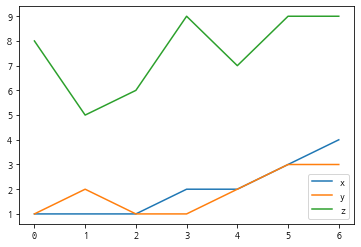

In [249]:
plt.plot(x)
plt.plot(y)
plt.plot(z)
plt.legend(['x','y','z']);

---

### 주성분분석

- adp02지도학습 전략 편 참조

---

### 연관성분석

In [ ]:
### 1번 유형 

In [254]:
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple' 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

# 데이터 전처리 : Bool 형태 변환
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.tail(3)

,Apple,AppleBananas,Bananas,Beer,Chicken,Milk,Rice
5,False,False,False,True,False,True,True
6,False,False,False,True,False,True,False
7,True,False,True,False,False,False,False


In [255]:
# 최소지지도 0.6 이상 
from mlxtend.frequent_patterns import apriori 
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.75,(Beer)


In [ ]:
# itemsets는 frozenset. list로 감싸서 원본 추출 
fs = apriori(df, min_support=0.6, use_colnames=True)['itemsets']
list(fs[0])[0]
>> Beer

In [265]:
# 규칙 길이 추출 방법 
freq_items = apriori(df, min_support=0.3, use_colnames=True)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.50,(Apple),1
1,0.75,(Beer),1
2,0.38,(Milk),1
3,0.50,(Rice),1
4,0.38,"(Beer, Apple)",2
5,0.38,"(Milk, Beer)",2
6,0.50,"(Beer, Rice)",2


In [ ]:
### 2번 유형 
- 데이터 전처리 

In [266]:
df = pd.read_csv('ADP_book_ver01/data/groceries.csv')
df.tail(1)

,"citrus fruit,semi-finished bread,margarine,ready soups"
9833,"chicken,tropical fruit,other vegetables,vinega..."


In [268]:
split = df.iloc[:,0].str.split(',', expand=True).values # 콤마 구분후, numpy 변환

groceries = []
for i in range(len(split)):
    temp = list(filter(None, split[i]))
    groceries.append(temp)
    
groceries[:3]

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads']]

In [270]:
# 데이터 전처리 : Bool 형태 변환
te = TransactionEncoder()
te_ary = te.fit_transform(groceries)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df.shape)
df.tail(3)

(9834, 169)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,potato products,potted plants,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
9831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [285]:
# 최종 결과 데이터 : 지지도 0.01 이상
from mlxtend.frequent_patterns import apriori, association_rules 
df_apriori = apriori(df, min_support=0.01, use_colnames=True)

# 신뢰도 0.3 이상 
association_rules(df_apriori, metric='confidence', min_threshold=0.3)


# 규칙 길이 2개 이상, 신뢰도 0.4, 향상도 3 이상 
rules = association_rules(df_apriori, metric='lift', min_threshold=1)
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))  # 규칙 길이 생성 

rules[ (rules['antecedents_len'] >=2) & (rules['confidence'] >= 0.4) & (rules['lift'] >= 3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
420,"(citrus fruit, root vegetables)",(other vegetables),0.02,0.19,0.01,0.59,3.03,0.01,1.95,2
492,"(root vegetables, tropical fruit)",(other vegetables),0.02,0.19,0.01,0.58,3.02,0.01,1.94,2


In [ ]:
### 3번 유형 : ADP R 로또 문제 

In [287]:
lotto = pd.read_csv('datafiles/lotto.csv')
lotto.tail(3)  # time_id는 제외, num1~num6이 회차별 로또 번호 

,time_id,num1,num2,num3,num4,num5,num6
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42
858,1,10,23,29,33,37,40


In [301]:
te = TransactionEncoder()
te_ary = te.fit_transform(lotto.iloc[:,1:].values)  # values로 행렬 처리해야 제대로 변환됨 
df = pd.DataFrame(te_ary, columns=te.columns_)
df.tail(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
856,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
858,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False


,support,itemsets
0,0.16,(34)
1,0.15,(27)
2,0.15,(40)
3,0.15,(43)
4,0.14,(20)
5,0.14,(17)
6,0.14,(12)
7,0.14,(14)
8,0.14,(13)
9,0.14,(1)


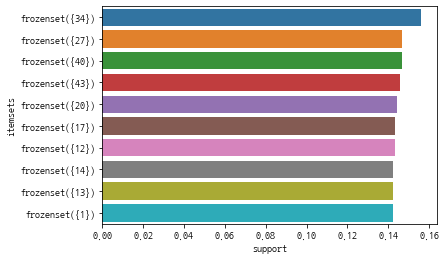

In [306]:
#가장 빈번하게 나오는 번호
from mlxtend.frequent_patterns import apriori, association_rules 

res = apriori(df, min_support=0.001, use_colnames=True).sort_values(by='support', ascending=False).iloc[:10]
sns.barplot(x='support', y='itemsets', data=res)
res.reset_index(drop=True)

In [309]:
# 최소지지도 0.002, 최소신뢰도 0.8, 최소조합항목수 2~6개 (우측항이 한개 세트인 경우만 고르기)
res = apriori(df, min_support=0.002, use_colnames=True)
res = association_rules(res, metric="confidence", min_threshold=0.8)

res['antecedents_len'] = res['antecedents'].apply(lambda x: len(x))
res['consequents_len'] = res['consequents'].apply(lambda x: len(x))
#res['len'] = res['antecedents_len'] + res['consequents_len']
res.query(" consequents_len == 1 ").sort_values(by='lift', ascending=False).iloc[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
254,"(28, 7, 23)",(9),0.00,0.10,0.00,1.00,9.65,0.00,inf,3,1
335,"(32, 43, 38)",(9),0.00,0.10,0.00,1.00,9.65,0.00,inf,3,1
324,"(17, 14, 33)",(9),0.00,0.10,0.00,1.00,9.65,0.00,inf,3,1
330,"(18, 35, 23)",(9),0.00,0.10,0.00,1.00,9.65,0.00,inf,3,1
591,"(33, 36, 37)",(22),0.00,0.11,0.00,1.00,9.34,0.00,inf,3,1


In [311]:
# 34가 우측항에 존재하는 규칙만 추출 : frozenset 형식 유의할 것 
res.loc[res['consequents'] == frozenset({34})].reset_index(drop=True).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
0,"(1, 5, 13)",(34),0.00,0.16,0.00,1.00,6.41,0.00,inf,3,1
1,"(2, 4, 31)",(34),0.00,0.16,0.00,1.00,6.41,0.00,inf,3,1
2,"(2, 21, 15)",(34),0.00,0.16,0.00,1.00,6.41,0.00,inf,3,1


In [312]:
# 1,5,13가 좌측항에 존재하는 규칙만 추출 : frozenset 형식 유의할 것 
res.loc[res['antecedents'] == frozenset({1,5,13})].reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
0,"(1, 5, 13)",(34),0.00,0.16,0.00,1.00,6.41,0.00,inf,3,1
